In [12]:
import nltk                                # Python library for NLP
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
data=pd.read_csv('/content/datasets_3901_6113_sms_spam.csv')

In [19]:
a=data.loc[data['type'] == 'spam']
b=data.loc[data['type'] == 'ham']

In [22]:
print('Number of spam sms: ', len(a))
print('Number of ham sms: ', len(b))

print('\nThe type of a is: ', type(a))
print('The type of an sms entry is: ', type(a.iloc[0]))

Number of spam sms:  747
Number of ham sms:  4812

The type of a is:  <class 'pandas.core.frame.DataFrame'>
The type of an sms entry is:  <class 'pandas.core.series.Series'>


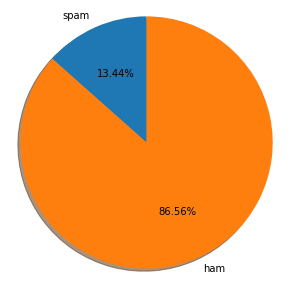

In [24]:
fig = plt.figure(figsize=(5, 5))

labels = 'spam','ham'

sizes = [len(a),len(b)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%.2f%%',
        shadow=True, startangle=90)

plt.axis('equal')  
plt.show()

In [33]:
print('\033[91m'+'spam     :' + a.iloc[random.randint(0,700)].text)
print('\033[92m' + 'ham      :' + b.iloc[random.randint(0,700)].text)

spam     :Claim a 200 shopping spree, just call 08717895698 now! Have you won! MobStoreQuiz10ppm
ham      :Ok.ok ok..then..whats ur todays plan


In [34]:
# Our selected sample
sample_spam=a.iloc[random.randint(0,700)].text
print(sample_spam)

Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app


In [36]:

# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [57]:
print('\033[92m' + sample_spam)
print('\033[94m')

# remove hyperlinks
sample_spam2 = re.sub(r'(\$)*[0-9](\.[0-9]+)?', '', sample_spam)


print(sample_spam2)

Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app

Todays Voda numbers ending  are selected to receive a  award. If you have a match please call  quoting claim code  standard rates app


In [58]:
print()
print('\033[92m' + sample_spam2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False)

# tokenize tweets
sms_tokens = tokenizer.tokenize(sample_spam2)

print()
print('Tokenized string:')
print(sms_tokens)


Todays Voda numbers ending  are selected to receive a  award. If you have a match please call  quoting claim code  standard rates app


Tokenized string:
['todays', 'voda', 'numbers', 'ending', 'are', 'selected', 'to', 'receive', 'a', 'award', '.', 'if', 'you', 'have', 'a', 'match', 'please', 'call', 'quoting', 'claim', 'code', 'standard', 'rates', 'app']


In [59]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [60]:
print()
print('\033[92m')
print(sms_tokens)
print('\033[94m')

sms_clean = []

for word in sms_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        sms_clean.append(word)

print('removed stop words and punctuation:')
print(sms_clean)



['todays', 'voda', 'numbers', 'ending', 'are', 'selected', 'to', 'receive', 'a', 'award', '.', 'if', 'you', 'have', 'a', 'match', 'please', 'call', 'quoting', 'claim', 'code', 'standard', 'rates', 'app']

removed stop words and punctuation:
['todays', 'voda', 'numbers', 'ending', 'selected', 'receive', 'award', 'match', 'please', 'call', 'quoting', 'claim', 'code', 'standard', 'rates', 'app']


In [62]:
print()
print('\033[92m')
print(sms_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
sms_stem = [] 

for word in sms_clean:
    stem_word = stemmer.stem(word)  # stemming word
    sms_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(sms_stem)



['todays', 'voda', 'numbers', 'ending', 'selected', 'receive', 'award', 'match', 'please', 'call', 'quoting', 'claim', 'code', 'standard', 'rates', 'app']

stemmed words:
['today', 'voda', 'number', 'end', 'select', 'receiv', 'award', 'match', 'pleas', 'call', 'quot', 'claim', 'code', 'standard', 'rate', 'app']
